## Twitter Sentiment Analysis
Determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

conda install -n py36 -c conda-forge tweepy
conda install -n py36 -c conda-forge textblob


In [36]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'Y6QWAWLoyjHCCA20qPmBp2wkI'
CONSUMER_SECRET = 'SZPH7zWLJuxDskwoRYqfUb2Lz1yeftyYGh7DBimGz1niLA6o5N'

# Access:
ACCESS_TOKEN  = '3896792723-IcHSdssHFC1cGpghgO2On6bc4j0y31Wzw2Yb2Gg'
ACCESS_SECRET = 'ejbGb8zEsvpIhcPtH264pkvsfkMYjspDvaT1YSexdxrAv'

# We import our access keys:
# optional from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api


Code for extracting from Twitter

In [59]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
# tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)

## search by hashtab
tweets = extractor.user_timeline(q='#HANA', count=500) 

print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 0.

5 recent tweets:



#### Creating a (pandas) DataFrame

In [39]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,@besenthil Hello! There are a variety of resou...
1,@marcteerlink We're glad to hear that you foun...
2,Customer experiences power retail consumers' p...
3,We’re bringing new functionalities to the ente...
4,VP of @SAP_designs instructs us to combine two...
5,12 predictions that can impact you and your bu...
6,Sometimes it’s as simple as embedding intellig...
7,@justinemoran95 Nice photo! Inspiration from t...
8,@brianmoran Thanks for the shout out! Our winn...
9,@markgibbs_china Agree -- this is terrific new...


In [40]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [41]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1083382859522555905
2019-01-10 15:19:36
Sprinklr
0
0
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'besenthil', 'name': 'Senthil', 'id': 14638891, 'id_str': '14638891', 'indices': [0, 10]}], 'urls': [{'url': 'https://t.co/kq5MY3LIEB', 'expanded_url': 'https://twitter.com/i/web/status/1083382859522555905', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [108, 131]}]}


In [42]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@besenthil Hello! There are a variety of resou...,131,1083382859522555905,2019-01-10 15:19:36,Sprinklr,0,0
1,@marcteerlink We're glad to hear that you foun...,137,1083379567539208192,2019-01-10 15:06:31,Sprinklr,1,0
2,Customer experiences power retail consumers' p...,140,1083368445650059264,2019-01-10 14:22:20,Sprinklr,5,1
3,We’re bringing new functionalities to the ente...,140,1083297746050867200,2019-01-10 09:41:24,Sprinklr,13,3
4,VP of @SAP_designs instructs us to combine two...,140,1083202404953264128,2019-01-10 03:22:32,Sprinklr,9,3
5,12 predictions that can impact you and your bu...,120,1083106673097691138,2019-01-09 21:02:08,Sprinklr,10,6
6,Sometimes it’s as simple as embedding intellig...,140,1083046243289497600,2019-01-09 17:02:01,Sprinklr,9,1
7,@justinemoran95 Nice photo! Inspiration from t...,101,1083043474361012225,2019-01-09 16:51:00,Sprinklr,1,0
8,@brianmoran Thanks for the shout out! Our winn...,138,1083042581745975297,2019-01-09 16:47:28,Sprinklr,1,0
9,@markgibbs_china Agree -- this is terrific new...,140,1083029849349021699,2019-01-09 15:56:52,Sprinklr,0,0


### Visualization and basic statistics

In [43]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 124.785


In [44]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

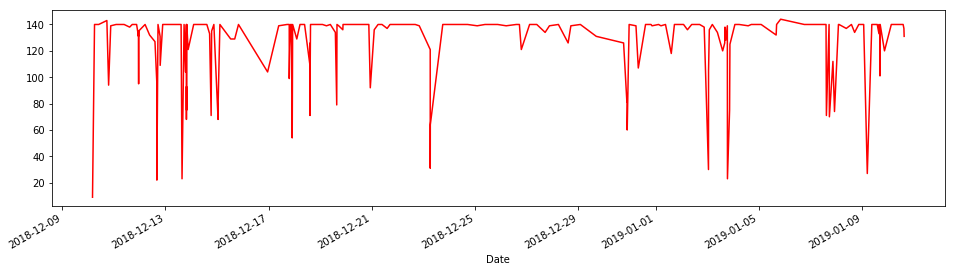

In [45]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');


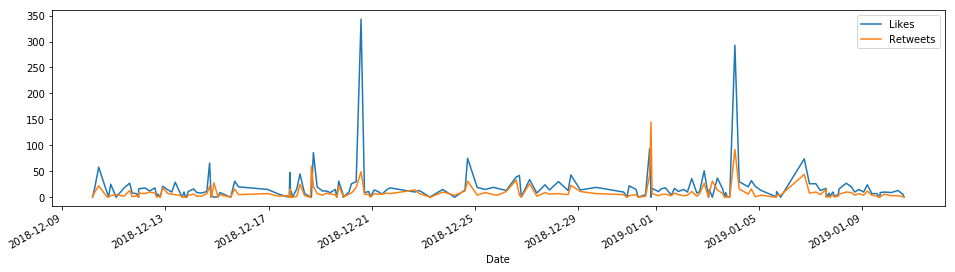

In [46]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);


### Sentimental Analysis

In [47]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [48]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@besenthil Hello! There are a variety of resou...,131,1083382859522555905,2019-01-10 15:19:36,Sprinklr,0,0,1
1,@marcteerlink We're glad to hear that you foun...,137,1083379567539208192,2019-01-10 15:06:31,Sprinklr,1,0,1
2,Customer experiences power retail consumers' p...,140,1083368445650059264,2019-01-10 14:22:20,Sprinklr,5,1,1
3,We’re bringing new functionalities to the ente...,140,1083297746050867200,2019-01-10 09:41:24,Sprinklr,13,3,1
4,VP of @SAP_designs instructs us to combine two...,140,1083202404953264128,2019-01-10 03:22:32,Sprinklr,9,3,0
5,12 predictions that can impact you and your bu...,120,1083106673097691138,2019-01-09 21:02:08,Sprinklr,10,6,0
6,Sometimes it’s as simple as embedding intellig...,140,1083046243289497600,2019-01-09 17:02:01,Sprinklr,9,1,0
7,@justinemoran95 Nice photo! Inspiration from t...,101,1083043474361012225,2019-01-09 16:51:00,Sprinklr,1,0,1
8,@brianmoran Thanks for the shout out! Our winn...,138,1083042581745975297,2019-01-09 16:47:28,Sprinklr,1,0,1
9,@markgibbs_china Agree -- this is terrific new...,140,1083029849349021699,2019-01-09 15:56:52,Sprinklr,0,0,1


In [49]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 72.0%
Percentage of neutral tweets: 27.0%
Percentage de negative tweets: 1.0%
